# Regression

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

In [28]:
import pandas as pd

file_path = r"C:\Users\12489\Documents\Data\boston.csv"

boston = pd.read_csv(file_path)
boston.head()

CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [29]:
boston.shape

(506, 14)

In [30]:
#Creating feature and target arrays
x = boston.drop("MEDV", axis=1).values
y = boston["MEDV"].values

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

#split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=120)

# scale the data... quickly & efficiently :)
pipe = make_pipeline(StandardScaler(), PCA(), LinearRegression())

pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)

0.6965950831927968

In [32]:
y_pred = pipe.predict(X_test)

rmse = sqrt(Mean(acutal - predicted)**2)
margin of error in same unit

In [33]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
rmse

5.3272817251956965

In [34]:
import statsmodels.formula.api as smf

reg_all = smf.ols(formula = "MEDV ~ CRIM + ZN + INDUS + CHAS + NX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT", data=boston).fit()

reg_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 13 Mar 2022   Prob (F-statistic):          6.72e-135
Time:                        12:42:51   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NX           -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
# define new data
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]

# make a prediction
yhat = pipe.predict([row])

# view prediction
yhat

array([29.98088363])

## **Cross-Validation**

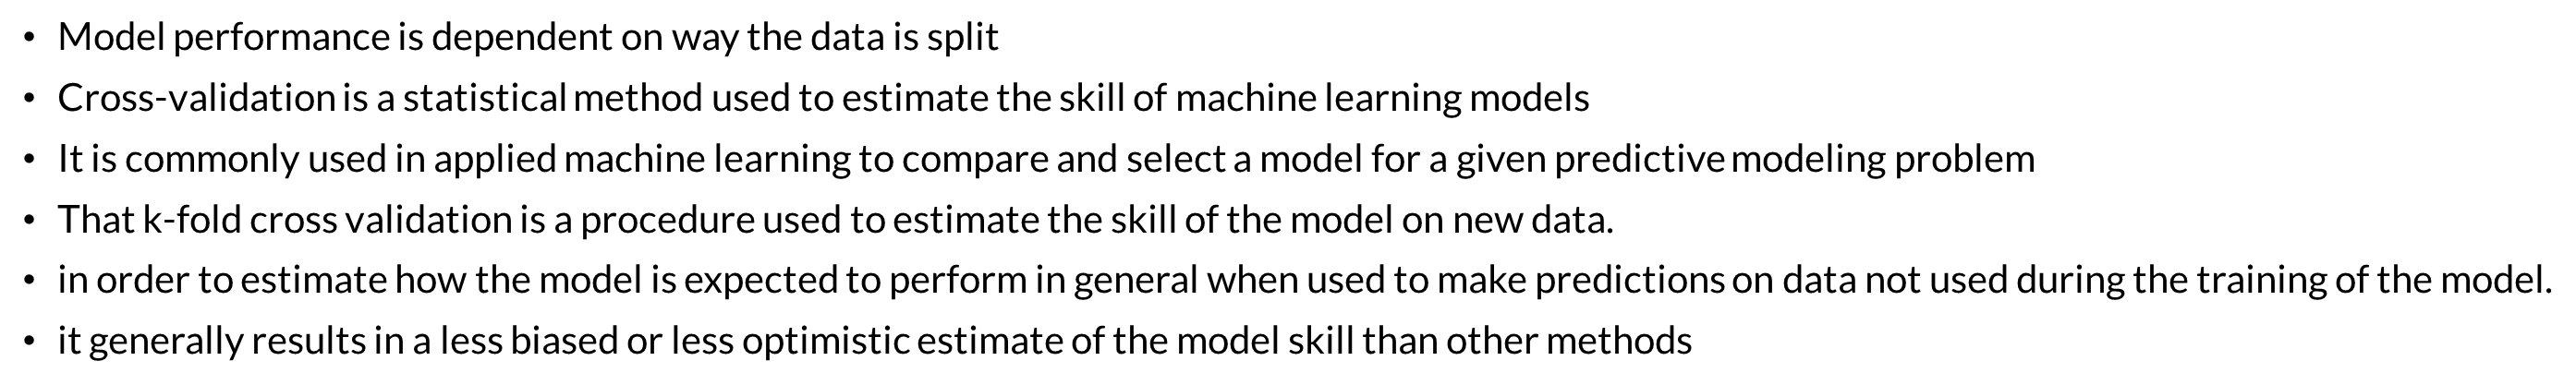

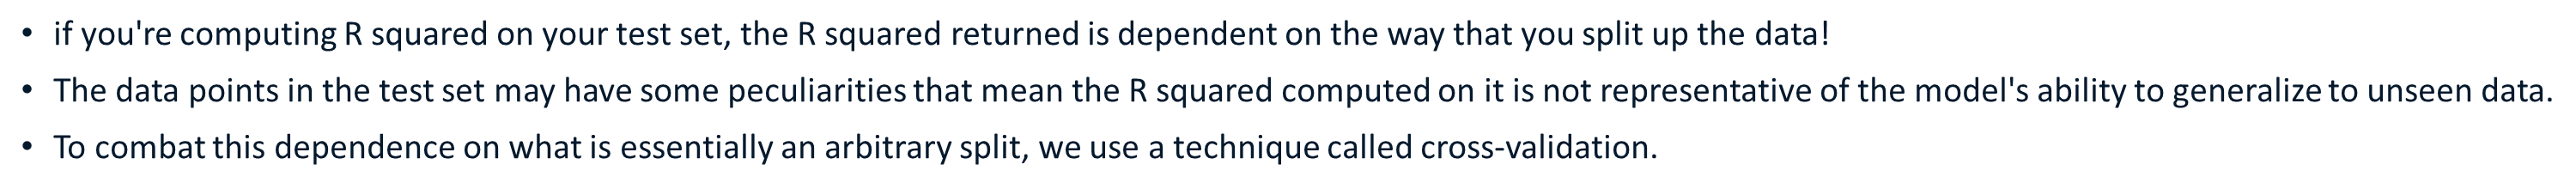

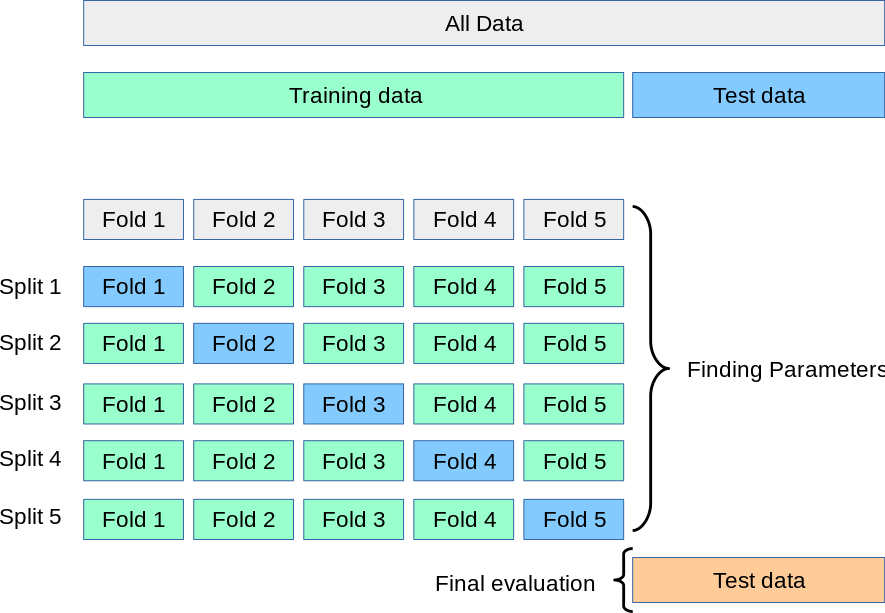

The choice of k is usually 5 or 10, but there is no formal rule.

As k gets larger, the difference in size between the training set and the resampling subsets gets smaller.

As this difference decreases, the bias of the technique becomes smaller 

To summarize, there is a bias-variance trade-off associated with the choice of k in k-fold cross-validation.

Typically, given these considerations, one performs k-fold cross-validation using k = 5 or k = 10,

as these values have been shown empirically to yield test error rate estimates

that suffer neither from excessively high bias nor from very high variance.

**Commonly used variations are as follows:**

**Train/Test Split:** Taken to one extreme, k may be set to 2 (not 1) such that a single train/test split is created to evaluate the model.

**LOOCV:** Taken to another extreme, k may be set to the total number of observations in the dataset such that each observation is given a chance to be the held out of the dataset. This is called leave-one-out cross-validation, or LOOCV for short.

**Stratified:** The splitting of data into folds may be governed by criteria such as ensuring that each fold has the same proportion of observations with a given categorical value, such as the class outcome value. This is called stratified cross-validation.

**Repeated:** This is where the k-fold cross-validation procedure is repeated n times, where importantly, the data sample is shuffled prior to each repetition, which results in a different split of the sample.

**Nested:** This is where k-fold cross-validation is performed within each fold of cross-validation, often to perform hyperparameter tuning during model evaluation. This is called nested cross-validation or double cross-validation.

In [36]:
from sklearn.model_selection import cross_val_score
import numpy as np

cv_results = cross_val_score(pipe, x, y, cv=3)
cv_results

array([ 0.5839083 ,  0.53248448, -5.86898835])

In [37]:
np.mean(cv_results)

-1.5841985220998065

take a look at Scikit-Learn's online [cross-validation documentation](http://scikit-learn.org/stable/modules/cross_validation.html).

# Ridge Regression

An extension to linear regression invokes adding penalties to the loss function during training that encourages simpler models that have smaller coefficient values.

These extensions are referred to as regularized linear regression or penalized linear regression.

Ridge Regression is a popular type of regularized linear regression that includes an L2 penalty.

This has the effect of shrinking the coefficients for those input variables that do not contribute much to the prediction task.

it is particularly useful to mitigate the problem of multicollinearity in linear regression, which commonly occurs in models with large numbers of parameters

The coefficients of the model are found via an optimization process that seeks to minimize the sum squared error between the predictions (yhat) and the expected target values (y)

# **Problem with Linear Regression**

A problem with linear regression is that estimated coefficients of the model can become large, making the model sensitive to inputs and possibly unstable.

This is particularly true for problems with few observations (samples) or less samples (n) than input predictors (p) or variables (so-called p >> n problems).

# **Effect of penalty**

The effect of this penalty is that the parameter estimates are only allowed to become large if there is a proportional reduction in SSE.

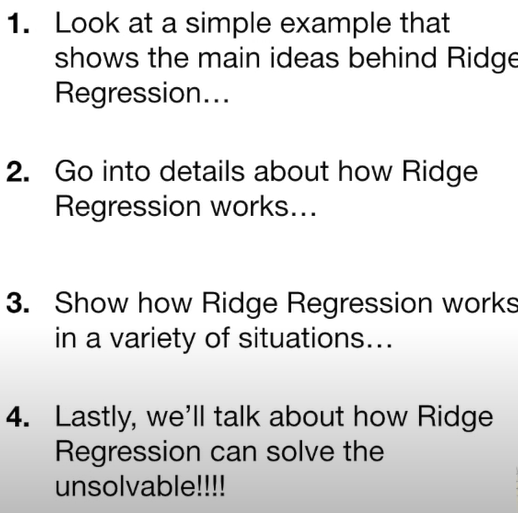

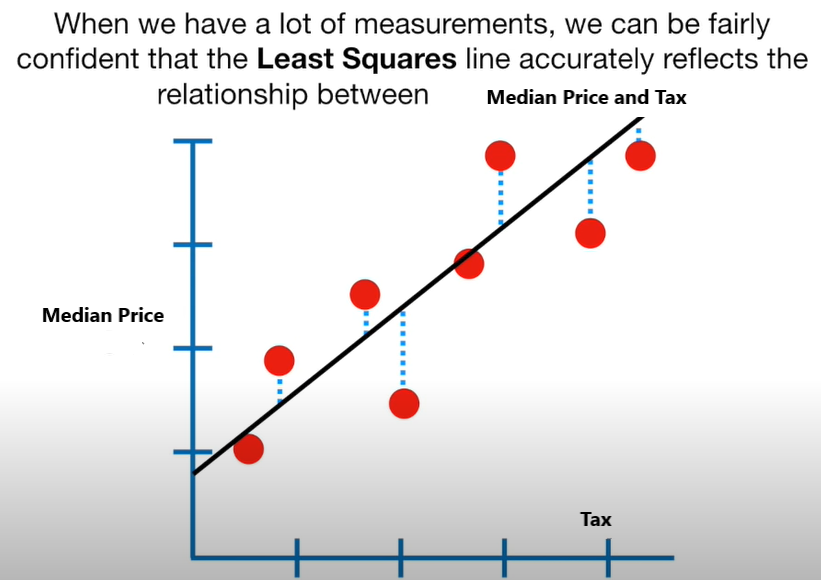

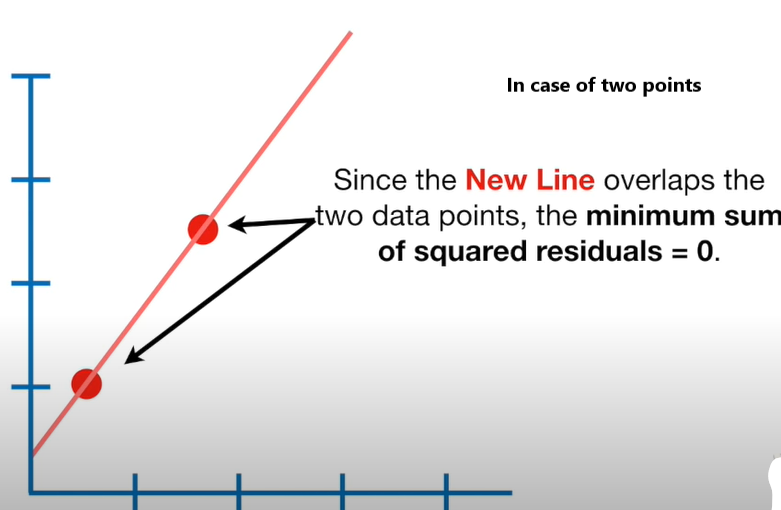

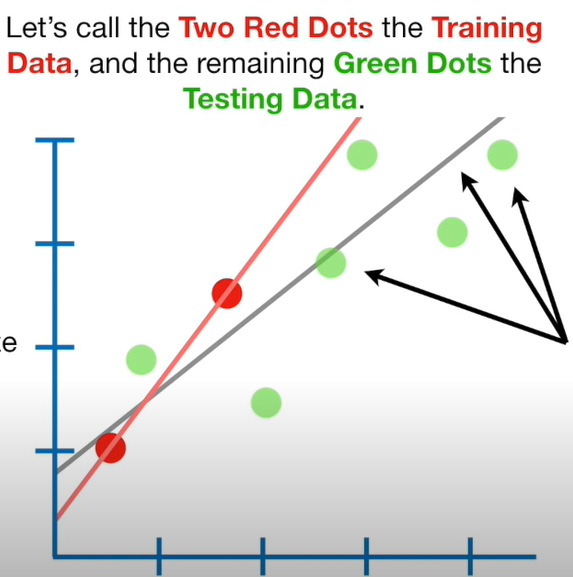

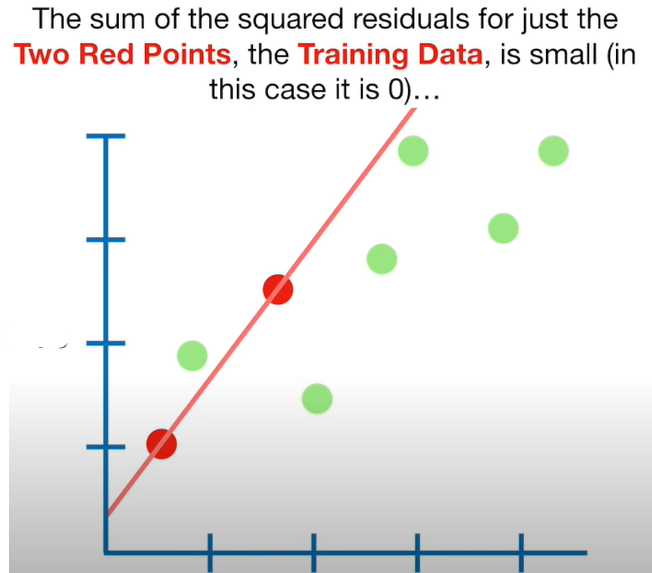

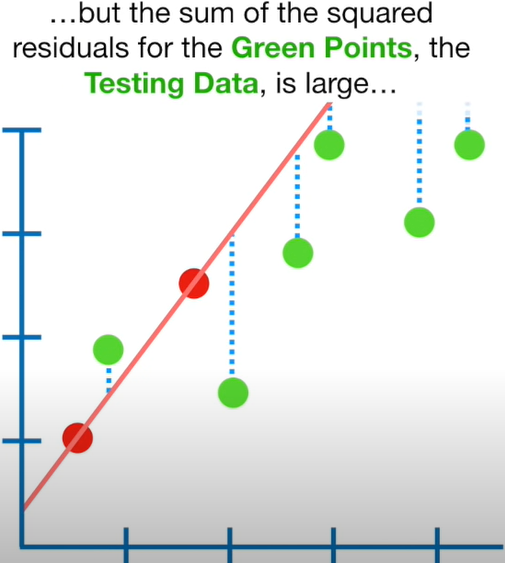

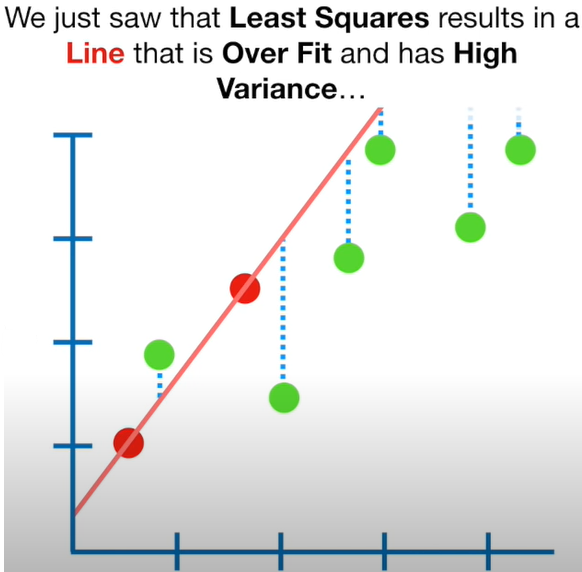

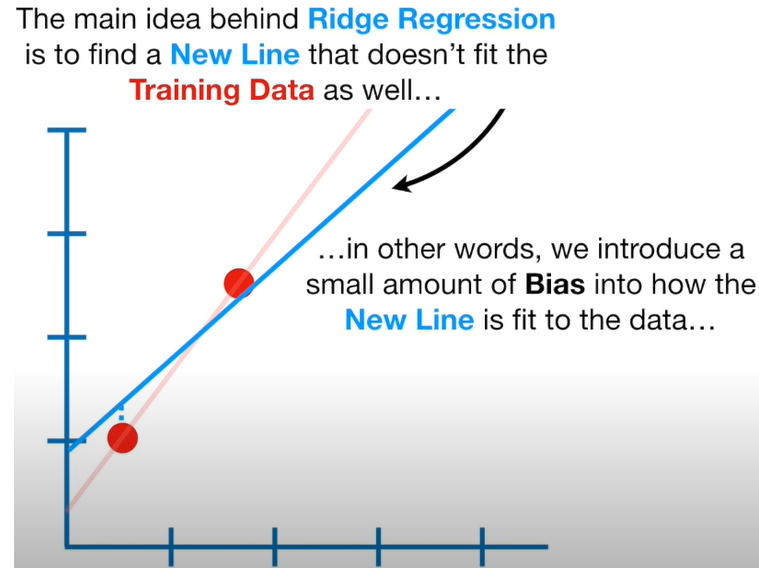

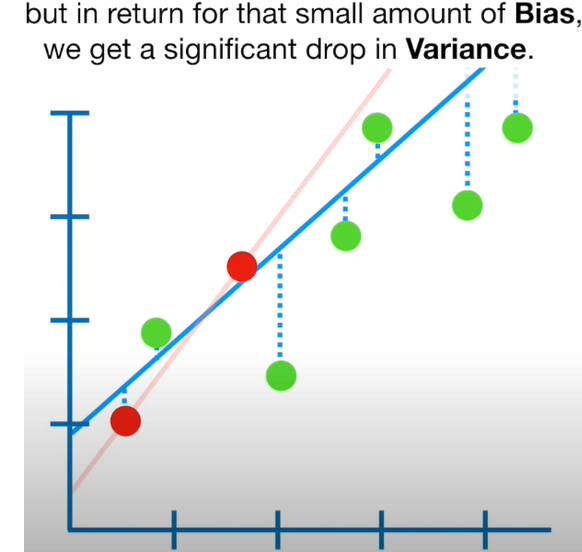

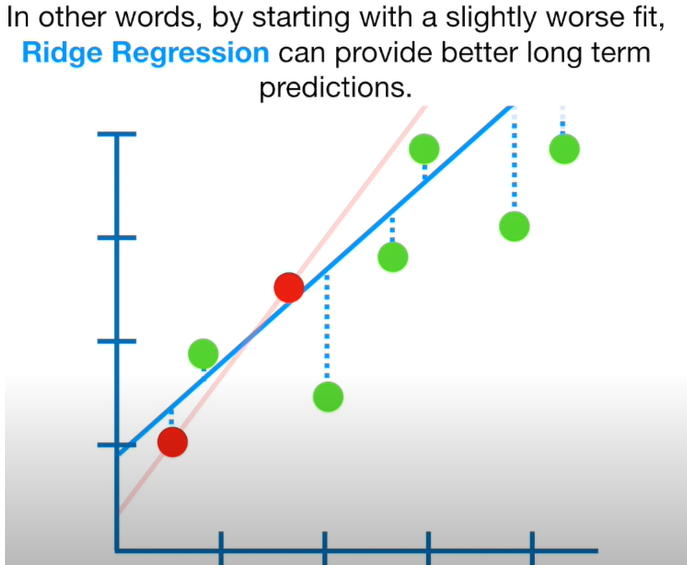

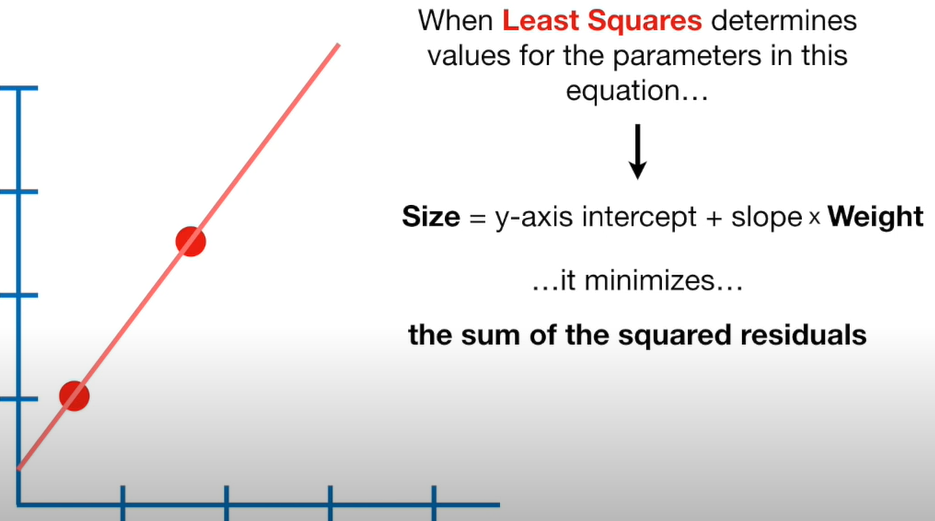

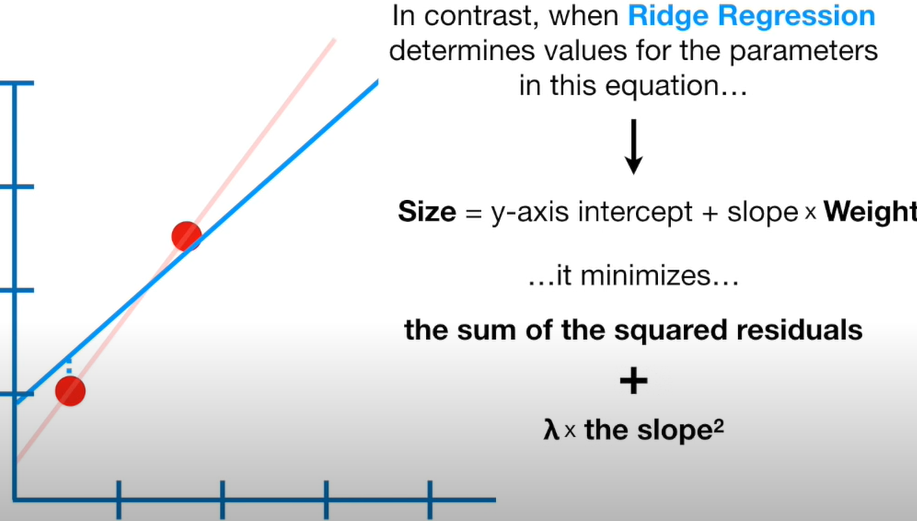

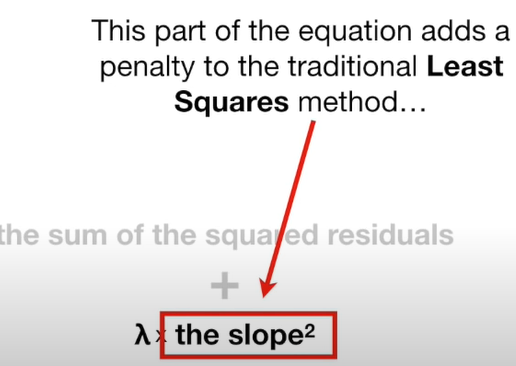

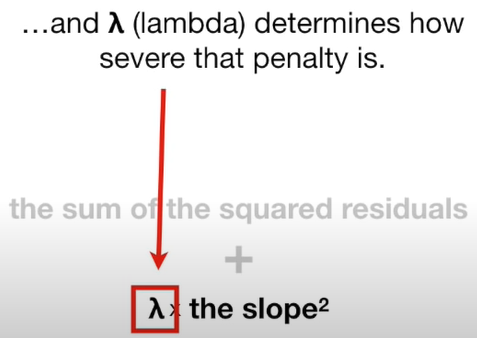

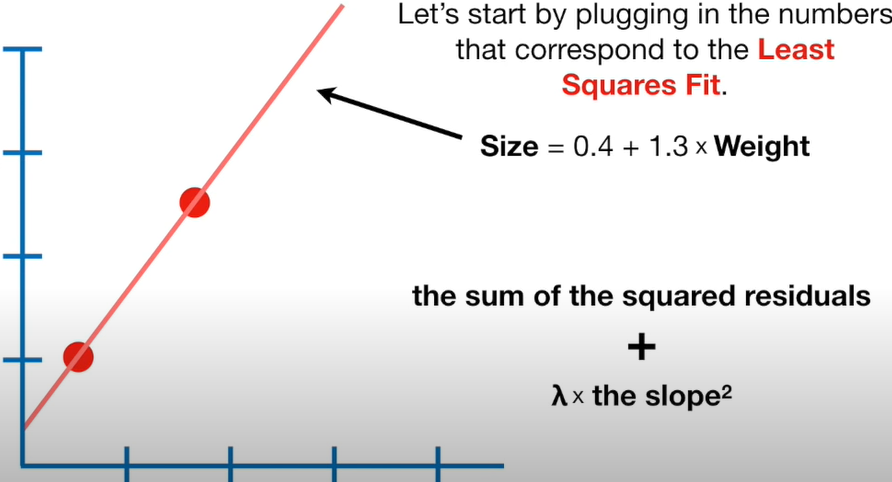

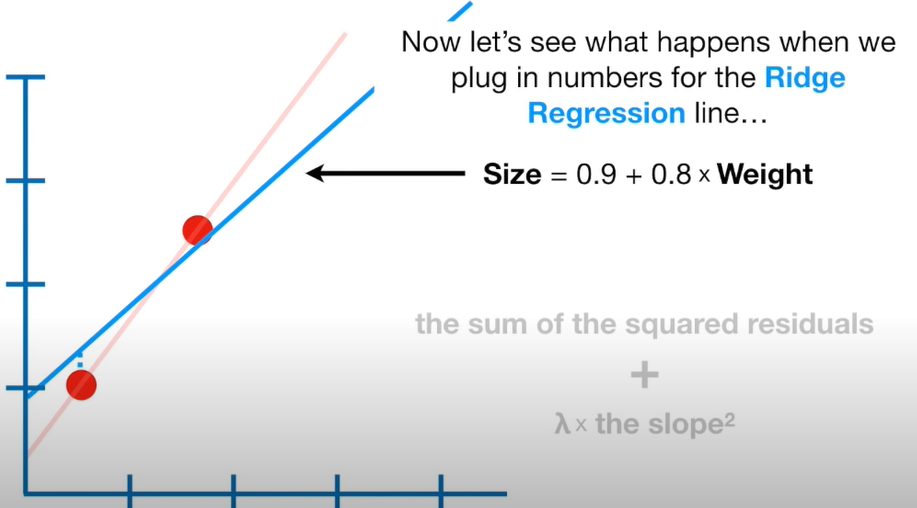

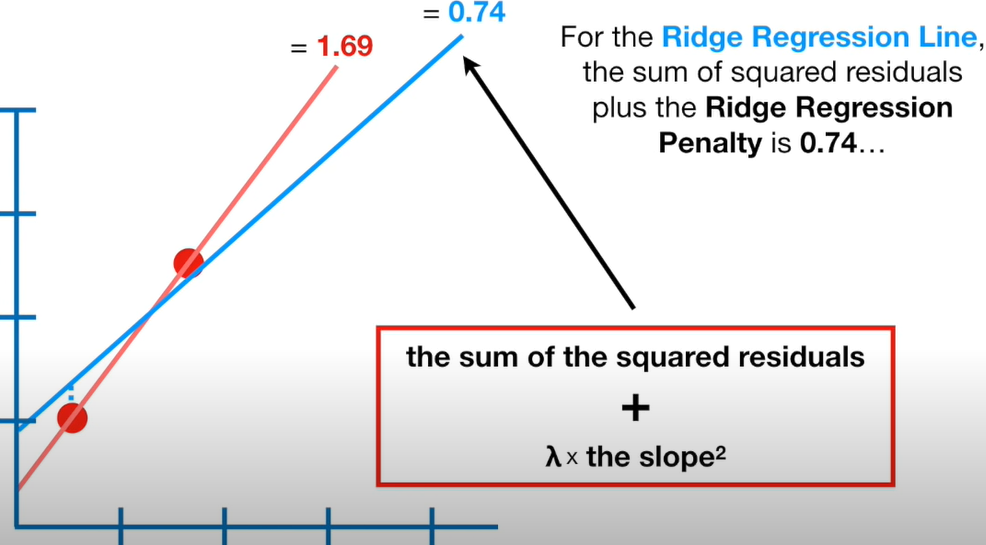

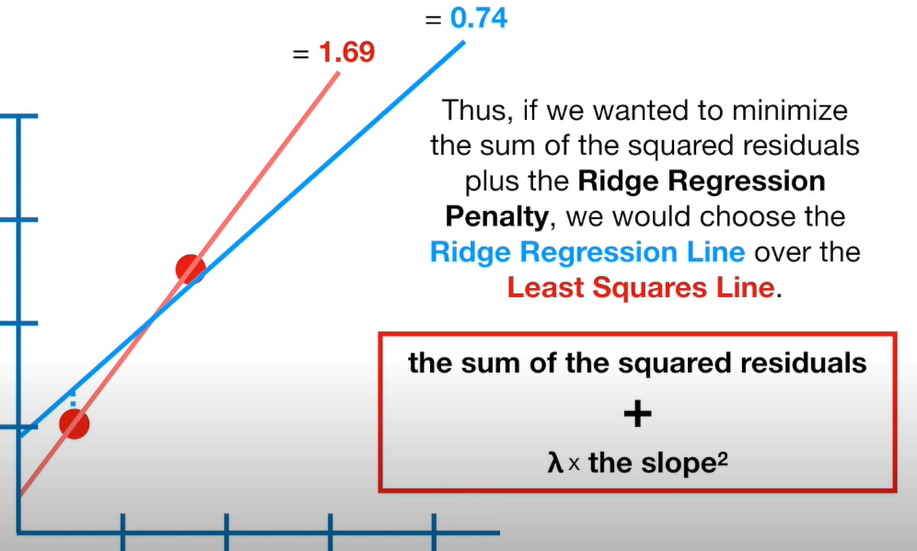

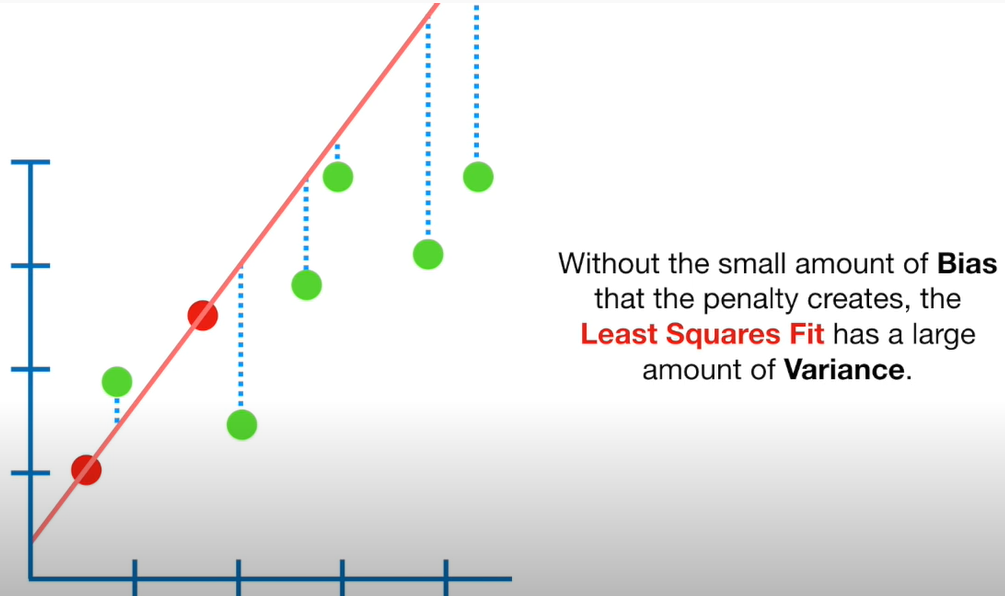

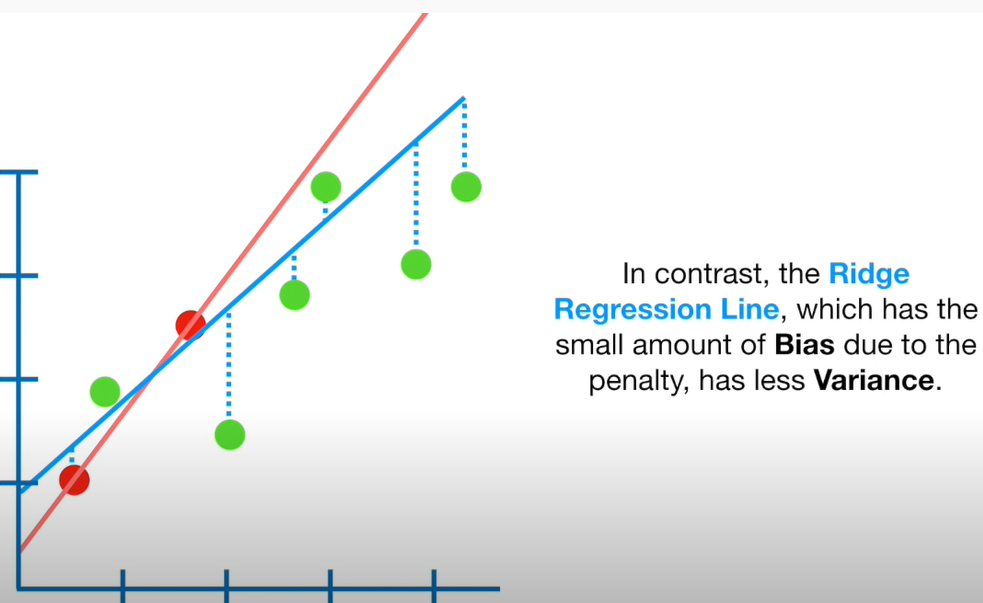

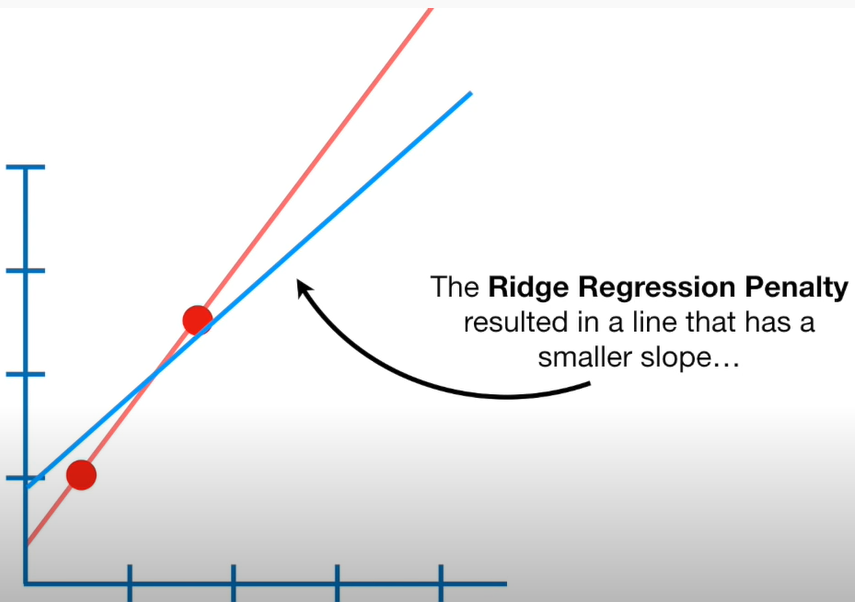

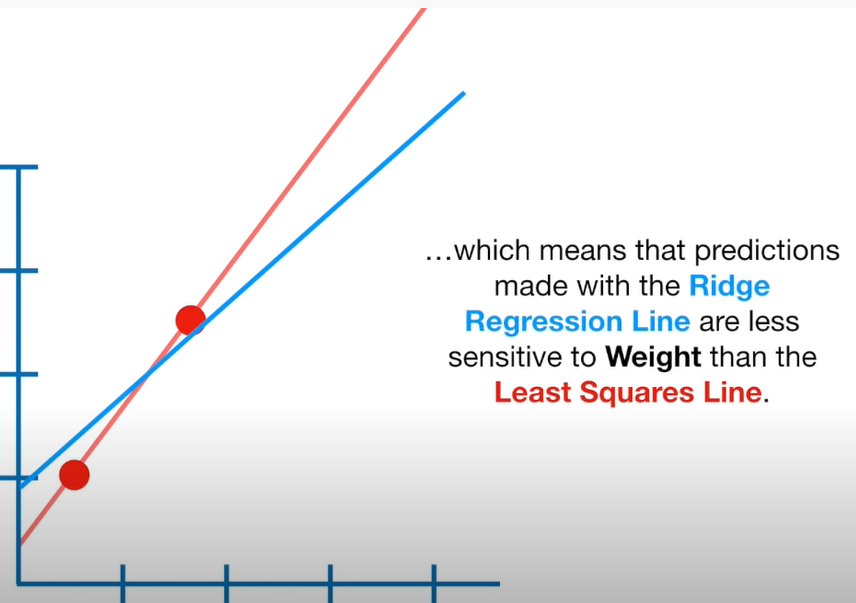

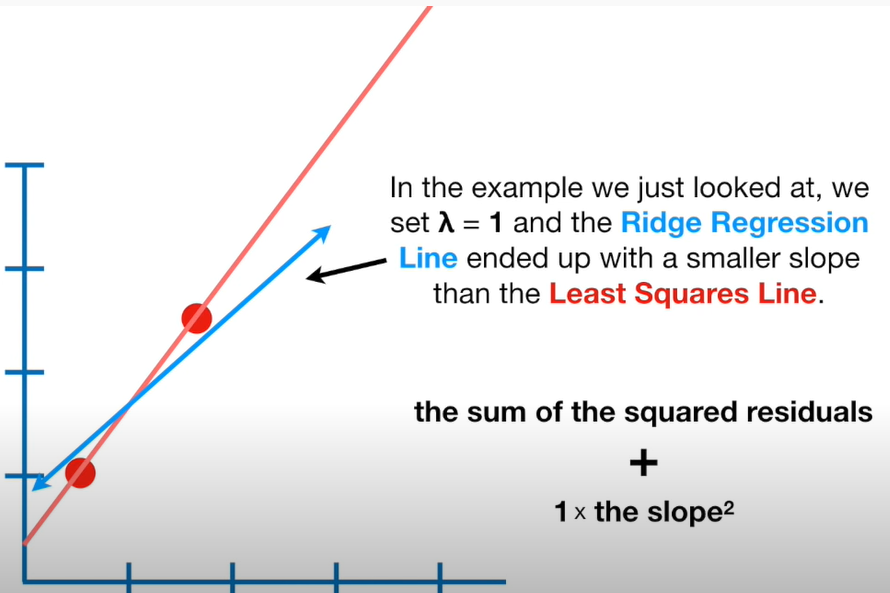

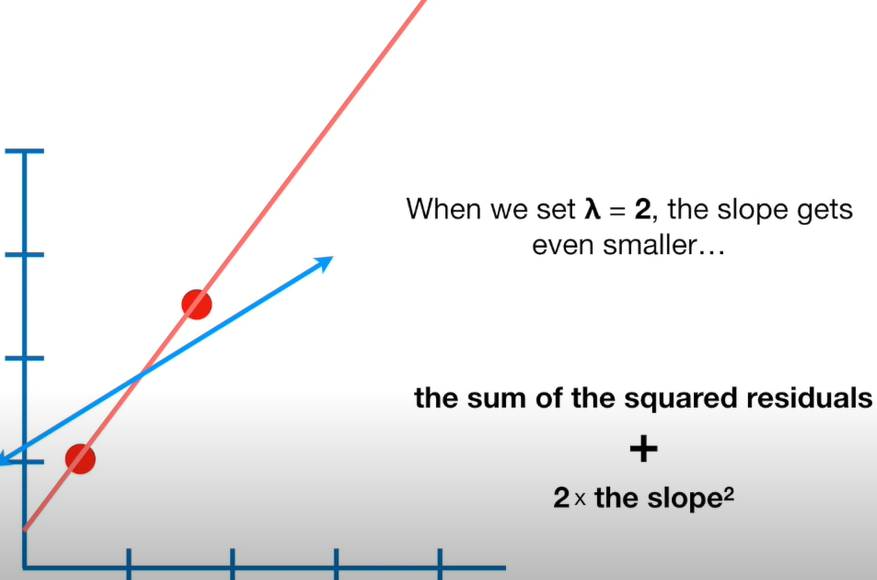

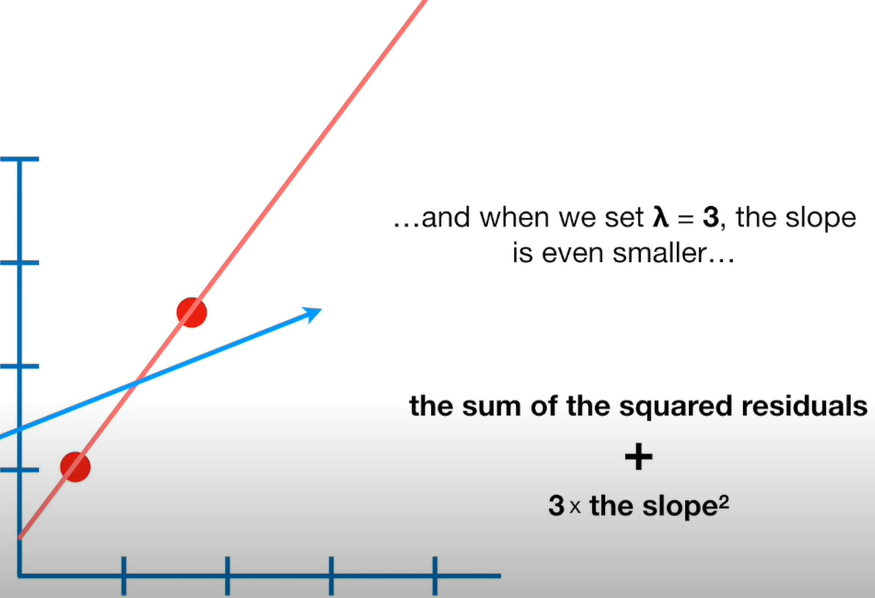

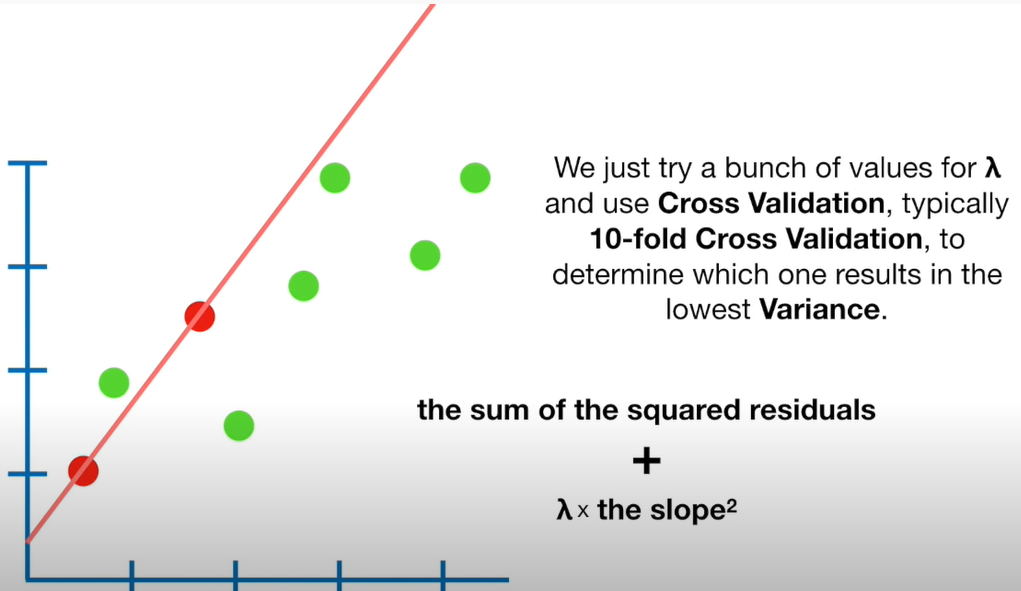

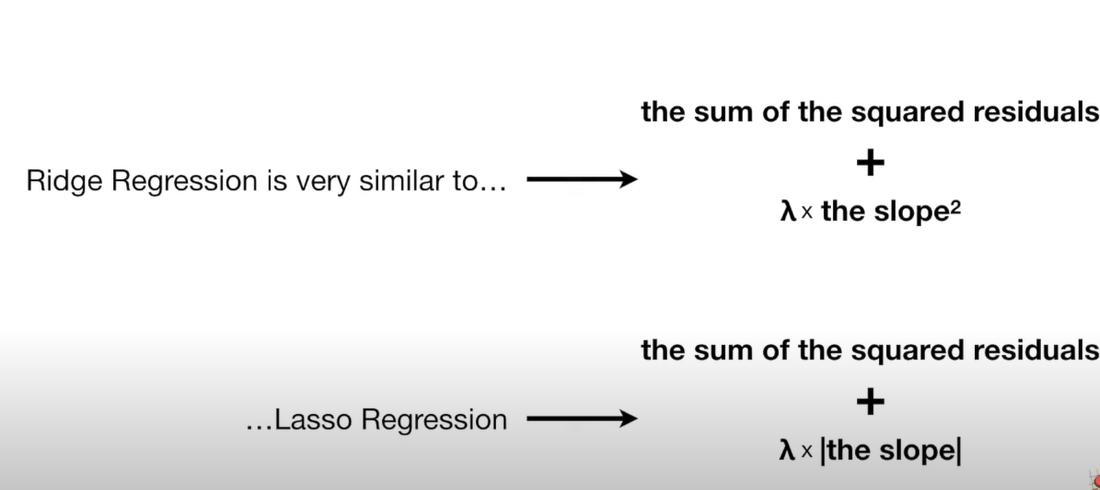

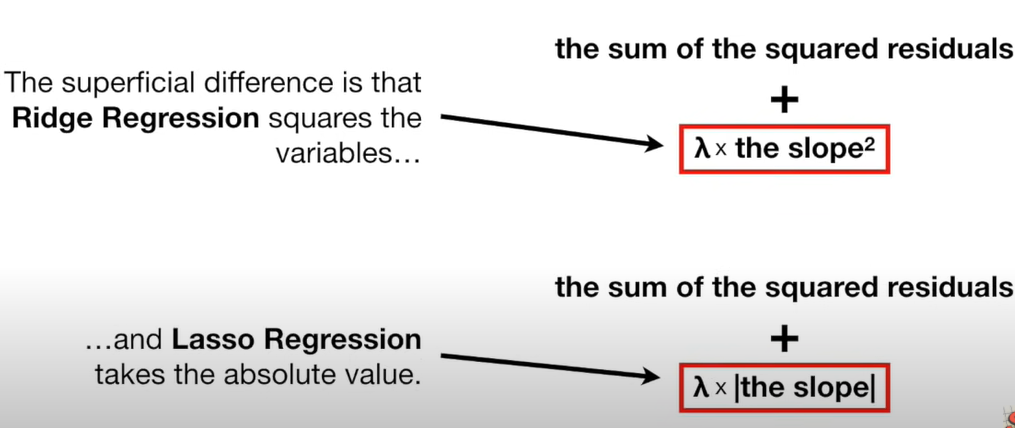

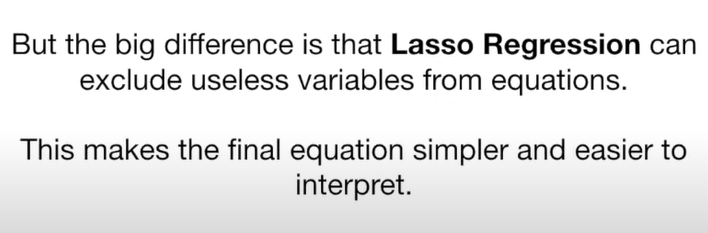

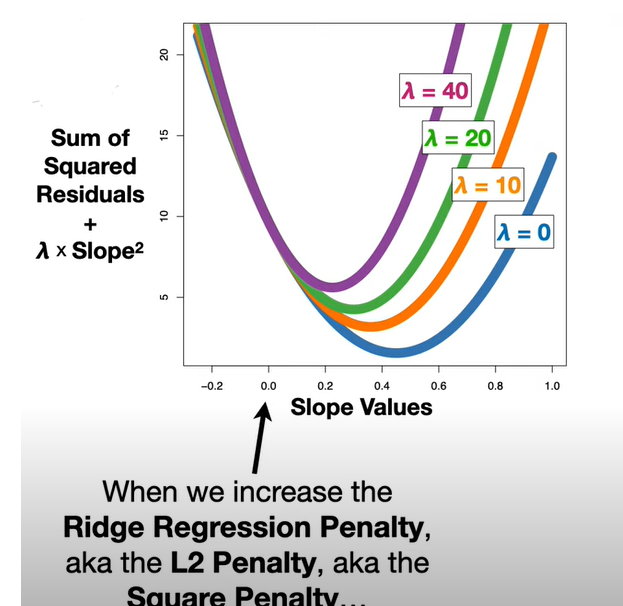

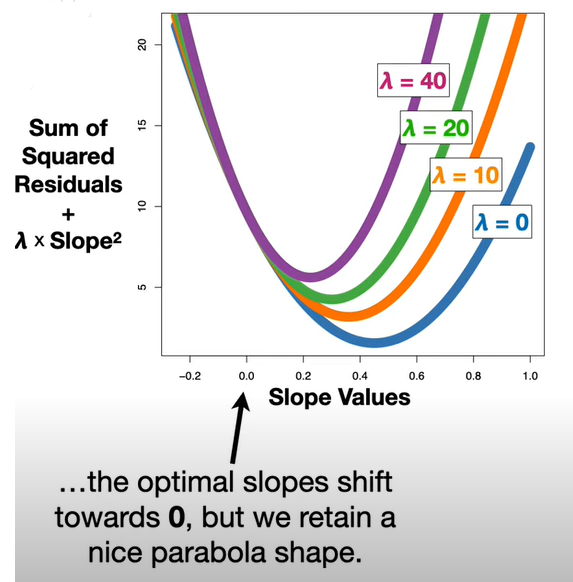

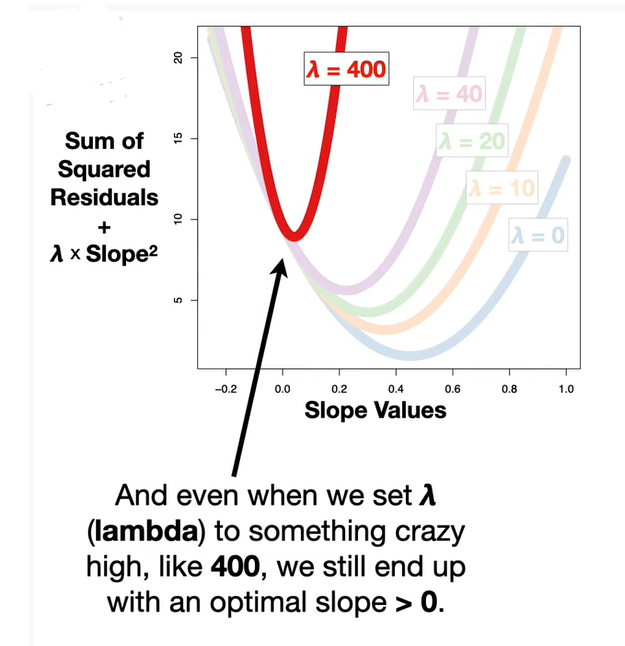

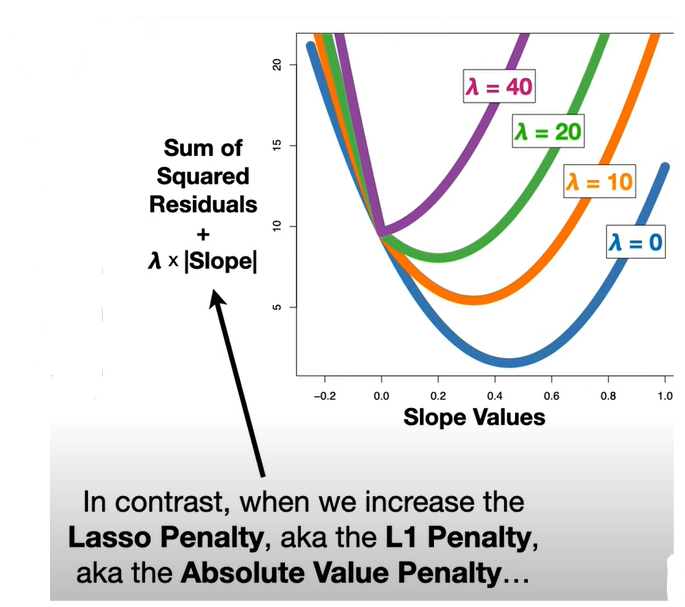

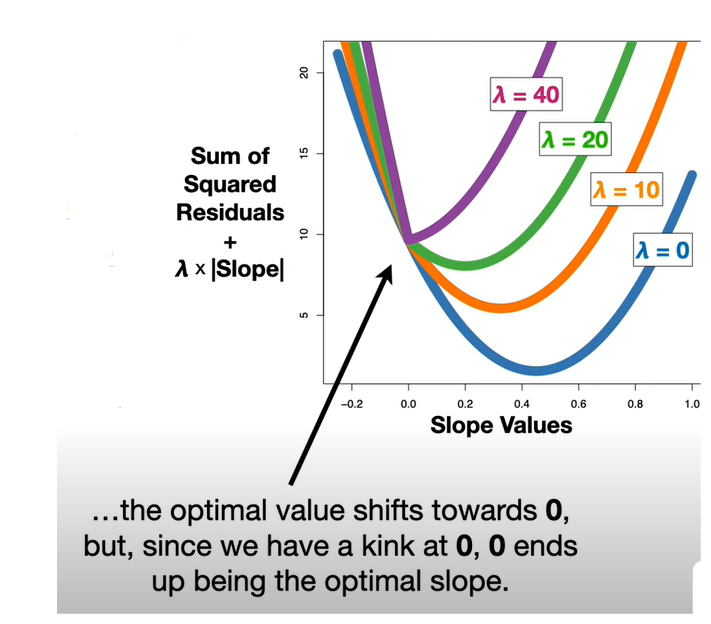

In [38]:
from numpy import mean
from numpy import std
from numpy import absolute

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge

# split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# define model
model = Ridge(alpha=1)
# #hyperparameter; an assumption #tuning of parameter

# fit model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

model.score(X_test, y_test)

0.7890510666829774

In [39]:
# define new data
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]

# make a prediction
y_hat = model.predict([row])

# summarize prediction
y_hat

array([30.19794657])

In [40]:
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae = mean_absolute_error(y_test, y_pred)
mae


3.2890418959157603

## **Ridge with CV**

In [41]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(model, x, y, scoring="neg_mean_absolute_error", cv=cv)

# force scores to be positive
absolute_scores = absolute(scores)

mean(absolute_scores), std(absolute_scores)

(3.38192024021598, 0.519038575652345)

In [42]:
model.fit(x, y)

# define new data
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]

# make a prediction
yhat = model.predict([row])

# summarize prediction
print('Predicted: %.3f' % yhat)

Predicted: 30.253


# **Lasso** without CV

In [43]:
# evaluate an lasso regression model on the dataset
from sklearn.linear_model import Lasso

# redefine the train test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

# define model
model = Lasso()

In [44]:
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae = mean_absolute_error(y_test, y_pred)
mae

3.2890418959157603

# Lasso with CV

In [45]:
# define model
model = Lasso(alpha=1)

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(model, x, y, scoring="neg_mean_absolute_error", cv=cv)

# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 3.711 (0.549)


In [46]:
model.fit(x,y)

Lasso(alpha=1)

In [47]:
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
yhat = model.predict([row])
print(yhat)

[30.99753918]


**Tuning Lasso Hyperparameters**

How do we know that the default hyperparameter of alpha=1.0 is appropriate for our dataset?

We don’t.

Instead, it is good practice to test a suite of different configurations and discover what works best for our dataset.

Another approach would be to test values between 0.0 and 1.0 with a grid separation of 0.01. We will try the latter in this case.

The example below demonstrates this using the GridSearchCV class with a grid of values we have d

In [48]:
# grid search hyperparameters for lasso regression
from sklearn.model_selection import GridSearchCV

# define model
model = Lasso()

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define parameters to be tuned
# (alpha/search-range, in this case)
parameters = {"alpha": np.arange(0,1, 0.01)}

# define the search
search = GridSearchCV(model, parameters, scoring="neg_mean_absolute_error", cv=cv)

# perform the search
results = search.fit(x, y)

# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

C:\Users\12489\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\12489\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\12489\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.034e+03, tolerance: 3.798e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using o

MAE: -3.379
Config: {'alpha': 0.01}


In [49]:
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
yhat = results.predict(([row]))
print(yhat)

[30.13974824]
